<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio Visualización

En este laboratorio usaremos el DataFrame de Netflix completo creado en los primeros laboratorios de Pandas. 

**Instrucciones:**

1. Lee cuidadosamente el enunciado de cada ejercicio.

2. Implementa la solución en la celda de código proporcionada.

3. Debes incluir después de cada gráfica la interpretación de las mismas en una celda de markdown. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 

df = pd.read_csv("netflix_merge.csv", index_col = 0, parse_dates = ["date_added"])

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'],
      dtype='object')

In [53]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead,Documentary,"October 2, 2020",90.0,7.5,English


#### Ejercicio 1: ¿Cuántos títulos por tipo (Películas vs Series) tenemos?. En esta gráfica deberás: 

- Incluir un título. 

- Cambiar el nombre de los ejes X e Y. 

- Cambiar el color de las barras. 

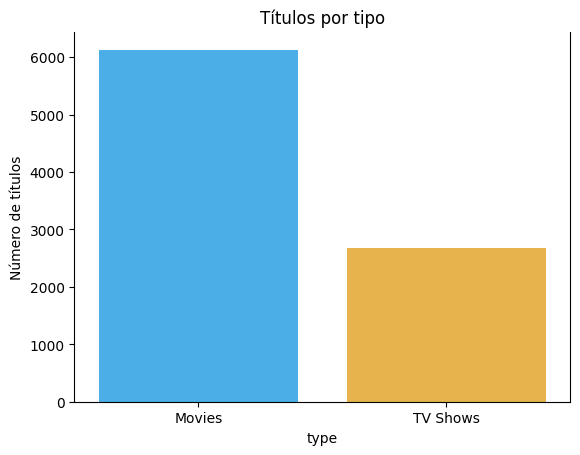

In [8]:

sns.countplot(x = "type", 
              data = df, 
              palette=["#33B5FF", "#FFBB33"], 
              hue = "type")


# eliminar el eje de arriba de la gráfica
plt.gca().spines["top"].set_visible(False)

# cambiar el nombre del eje y
plt.ylabel("Número de títulos")

# cambiar nombre etiquetas eje y
plt.xticks(ticks = [0,1], labels = ["Movies", "TV Shows"])

plt.title("Títulos por tipo");

#### Ejercicio 2: ¿Cuál es la distribución de calificaciones (rating) en los títulos? En esta gráfica deberás:

- Mostrar los resultados ordenados de mayor a menor. 

- Rotar las etiquetas del eje X. 

- Quitar el nombre del eje X. 

- Cambiar el nombre del ehje Y. 

- Ponerle título a la gráfica. 



In [16]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [41]:
filtro_rating = df["rating"].str.contains(r"-|nr|g|r|ur",case=False, na = False)
df_categorias_rating = df[filtro_rating]["rating"].value_counts().reset_index()

df_categorias_rating

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


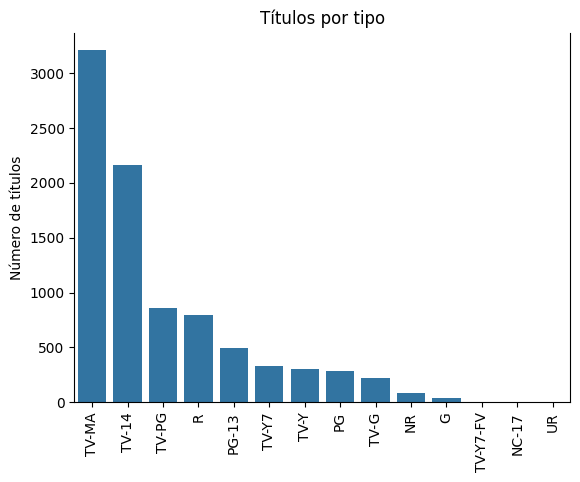

In [51]:
sns.barplot(x = "rating", 
            y = "count",
            data = df_categorias_rating)

# eliminar el eje de arriba de la gráfica
plt.gca().spines["top"].set_visible(False)

# cambiar el nombre del eje y
plt.ylabel("Número de títulos")

plt.xlabel(None)
plt.xticks(rotation = 90) #rotar labels x
plt.title("Títulos por tipo");

#### Ejercicio 3: ¿Cuál es el top 10 de países con más títulos disponibles? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 



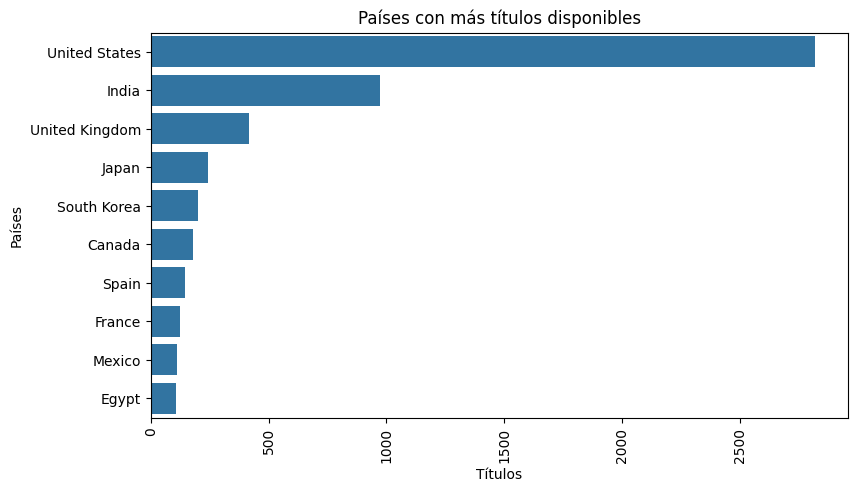

In [65]:
df_3 = df.groupby("country")["title"].count().reset_index().sort_values(by = "title", ascending = False)

df_agrupado = df_3.head(10)

plt.figure (figsize = (9,5))
sns.barplot(x="title",
            y = "country",
            data = df_agrupado)

# cambiar el nombre del eje y
plt.ylabel("Países")
plt.xlabel("Títulos")
plt.title('Países con más títulos disponibles')
plt.xticks(rotation = 90);

#### Ejercicio 5: ¿Cuál es la puntuación promedio de las películas según su calificación? Deberás:


- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 

- Cambia el tamaño de la gráfica a 15 x 5

/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_1367/3266671234.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df[filtro_rating][filtro_imdb].groupby("rating")[["IMDB Score"]].mean().sort_values("IMDB Score", ascending=False)
/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_1367/3266671234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating",


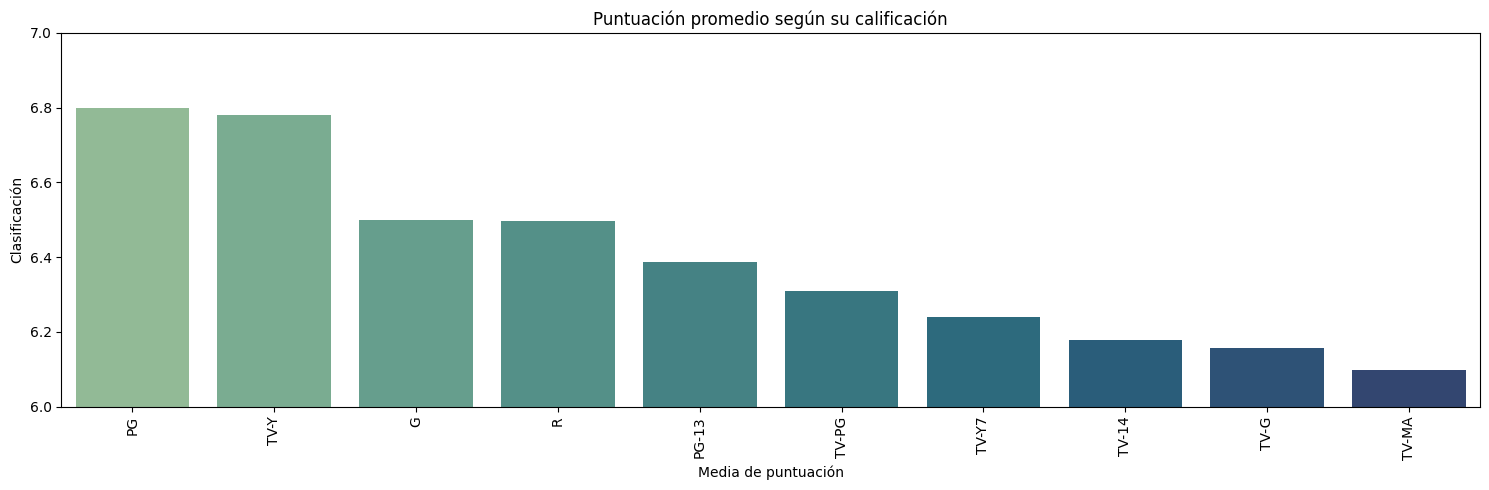

In [66]:
filtro_rating = df["rating"].str.contains(r"-|nr|r|g|ur", case=False, na=False)
filtro_imdb = df["IMDB Score"].notnull()

df_filtrado = df[filtro_rating][filtro_imdb].groupby("rating")[["IMDB Score"]].mean().sort_values("IMDB Score", ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x="rating",
            y="IMDB Score",
            data=df_filtrado,
            palette="crest");
plt.xlabel("Media de puntuación")
plt.ylabel("Clasificación")
plt.title("Puntuación promedio según su calificación")
plt.xticks(rotation=90)
plt.ylim(6,7)
plt.tight_layout()

# He notado que los valores se encuentran entre 6 y 7 por lo que he cortado el valor y para que sea más representativo

#### Ejercicio 6: ¿Cuál es la relación entre la duración de las películas y su puntuación en IMDb? Deberás:

- Cambiar el tamaño de los puntos. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 


Text(0.5, 1.0, 'Tendencia IMDB Score y Runtime')

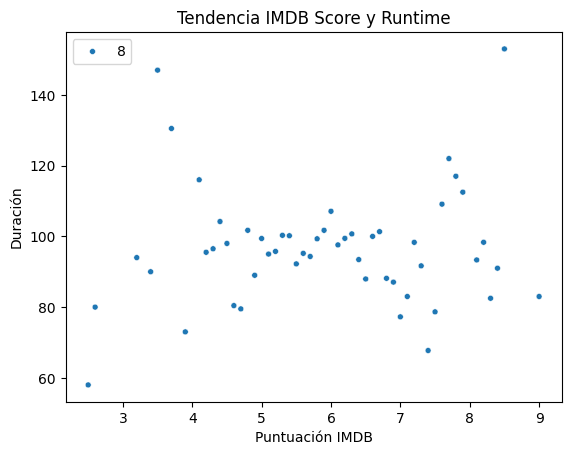

In [216]:
relacion_pelis_imdb = df.groupby("IMDB Score")[["Runtime"]].mean().reset_index()

sns.scatterplot( x = "IMDB Score",
             y = "Runtime",
             data = relacion_pelis_imdb,
             size = 8);

plt.ylabel("Duración")
plt.xlabel("Puntuación IMDB")
plt.title("Tendencia IMDB Score y Runtime")


In [67]:
#promedio_imdb = df.groupby("IMDB Score")["duration"].mean()
#condicion_imdb = promedio_imdb.notnull()

#promedio_imdb[condicion_imdb].sort_values(ascending=False).reset_index()

#### Ejercicio 7: ¿Cómo se distribuye la puntuación en IMDb según los 10 idiomas más usados? Deberás:

- Usa una gráfica que nos muestre la mediana y los cuartiles. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_1367/2156414492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "IMDB Score",


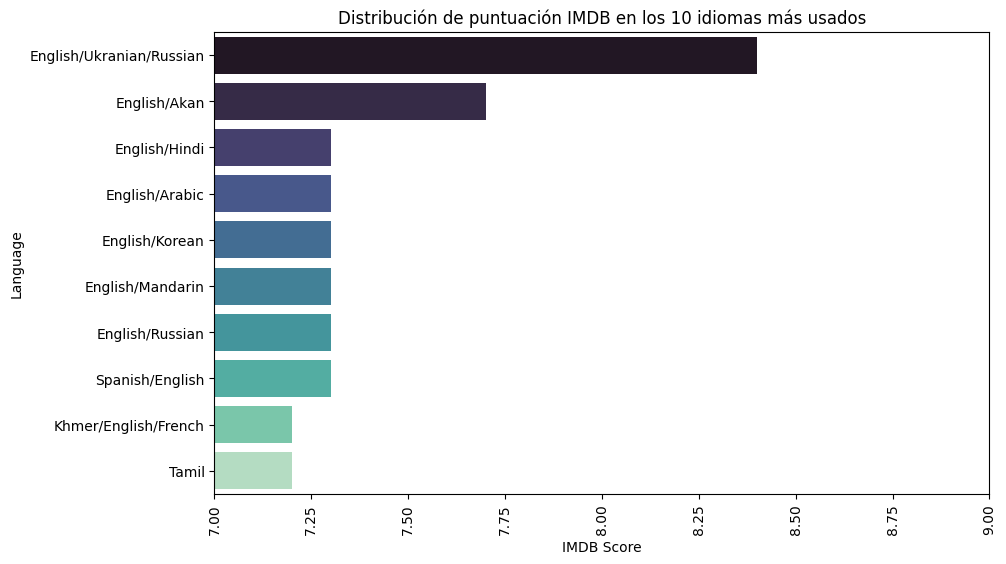

In [130]:
# Agrupo país, idioma y cuento cantidad 

df_leng_mas_frecuente = df.groupby("Language")["IMDB Score"].mean().nlargest(10).reset_index()
df_leng_mas_frecuente

plt.figure(figsize=(10,6))
sns.barplot(x = "IMDB Score",
            y = "Language",
            data = df_leng_mas_frecuente,
            palette = "mako",)

plt.title("Distribución de puntuación IMDB en los 10 idiomas más usados", fontsize = 12)
plt.xlabel("IMDB Score")
plt.ylabel("Language")
plt.xlim(7,9)
plt.xticks(rotation = 90)

plt.show() #print de las gráficas

#### Ejercicio 8: ¿Cuáles son los 10 directores que tienen las puntuaciones más altas?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Cambiar el tamaño de la gráfica. 



/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_1367/1774763344.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "director",


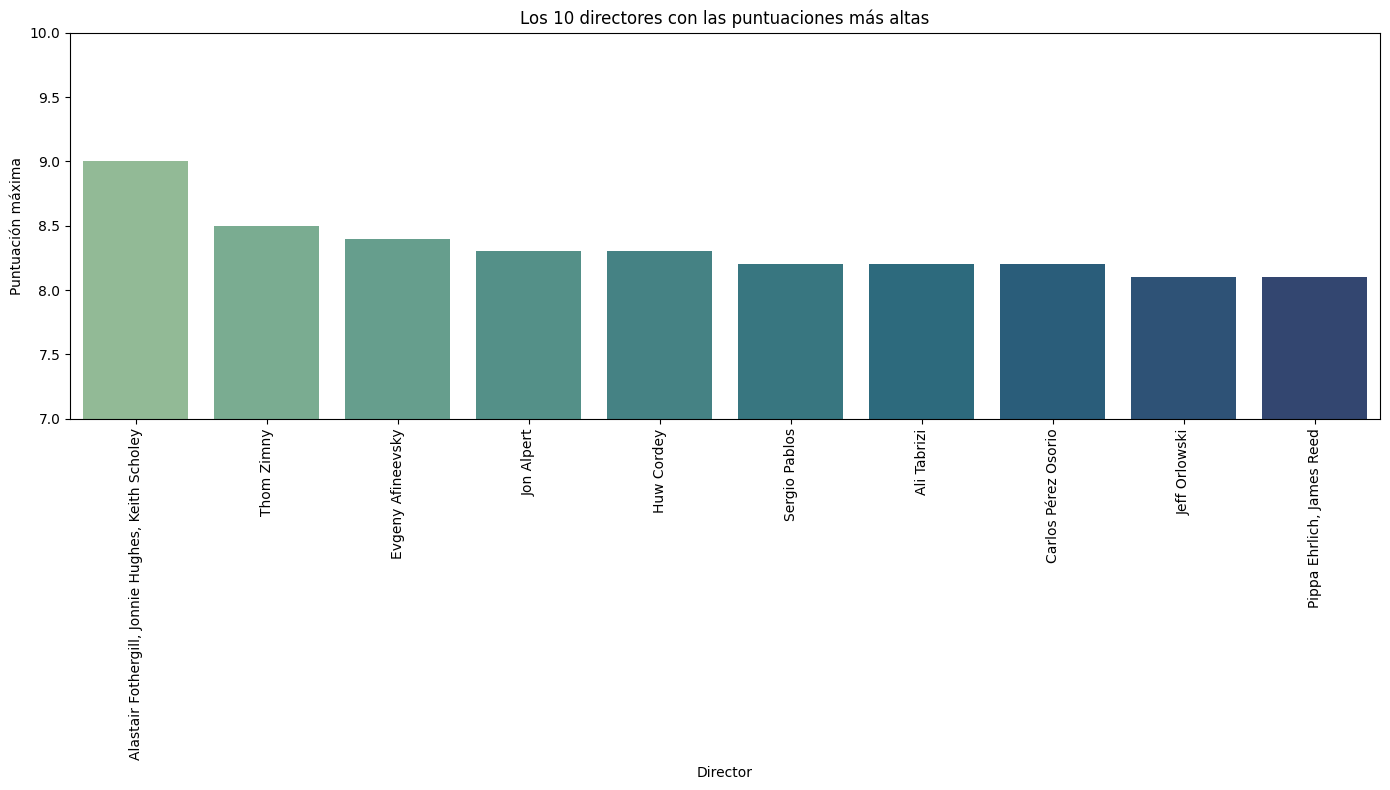

In [129]:
df_agrupado = df.groupby("director")[["IMDB Score"]].max().reset_index().sort_values("IMDB Score", ascending=False).nlargest(10, "IMDB Score")


plt.figure(figsize=(14,8))
sns.barplot(x = "director",
            y="IMDB Score",
            data=df_agrupado,
            palette="crest")

plt.xlabel("Director")
plt.ylabel("Puntuación máxima")
plt.title("Los 10 directores con las puntuaciones más altas")

plt.xticks(rotation=90)
plt.ylim(7,10)
plt.tight_layout()


#### Ejercicio 9:  ¿Cuál es la distribución de títulos por tipo y calificación? Soluciona este ejercicio usando subplots. Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 


/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_1367/190569535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "type",
/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_1367/190569535.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "rating",


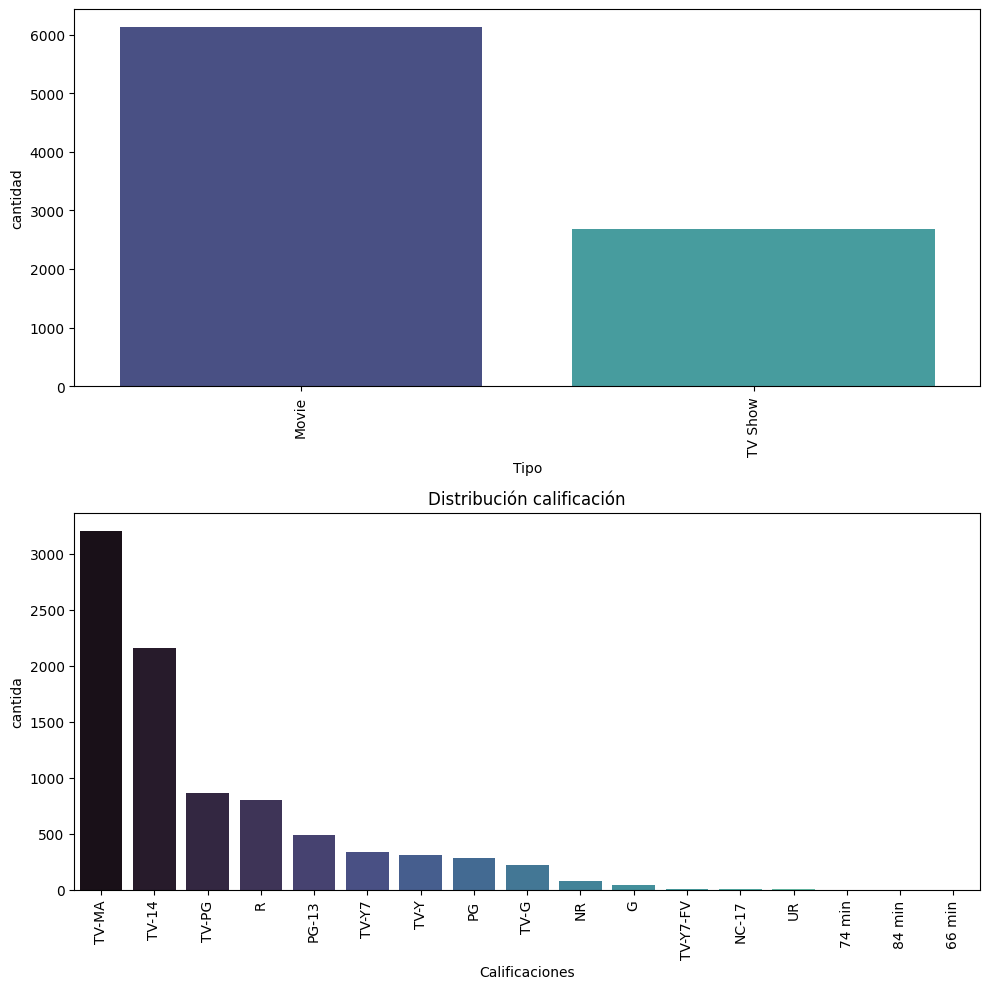

In [287]:
df_rating = df['rating'].value_counts().reset_index()

fig, axes = plt.subplots(2, 1, figsize = (10, 10))

sns.countplot(x = "type",
              data = df,
              palette = "mako",
              ax = axes[0]
              );

sns.barplot(x = "rating",
            y = "count",
            data = df_rating,
            palette = "mako",
            ax = axes[1]
            );

axes[0].set_xlabel("Tipo")
axes[0].set_ylabel("cantidad")
axes[0].tick_params(axis = "x", labelrotation = 90)

axes[1].tick_params(axis = 'x',labelrotation = 90)
axes[1].set_title("Distribución calificación")
axes[1].set_xlabel("Calificaciones")
axes[1].set_ylabel("cantida")

plt.tight_layout()

#### Ejercicio 10: ¿Cómo se distribuyen los títulos por país para los 6 principales países? Tienes que crear una gráfica para cada país mostrando los resultados en un subplot. Deberás: 

#### Correcto: En el ejercicio 10, tenemos que sacar el numero de pelis y series (el tipo) para los 6 principales paises, mostrando cada pais en un subplot.

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 



In [255]:
principales_paises_6 = df.groupby("country").count().nlargest(6, columns="title").reset_index()
paises = principales_paises_6["country"]
lista_paises = list(paises)

nuevo_df = df[df["country"].isin(lista_paises)]
nuevo_df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead,Documentary,"October 2, 2020",90.0,7.5,English
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,NaN,NaN,NaN,NaN,NaN
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,NaN,NaN,NaN,NaN,NaN,NaN
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,NaN,NaN,NaN,NaN,NaN,NaN
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,NaN,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,NaN,NaN,NaN,NaN,NaN,NaN
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",NaN,NaN,NaN,NaN,NaN,NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,NaN,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,NaN,NaN,NaN,NaN,NaN,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,NaN,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_1367/1915805207.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "type", data = df_paises, palette="mako", ax=axes[i][j])
/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_1367/1915805207.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "type", data = df_paises, palette="mako", ax=axes[i][j])
/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_1367/1915805207.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "type", data = df_paises, palet

10


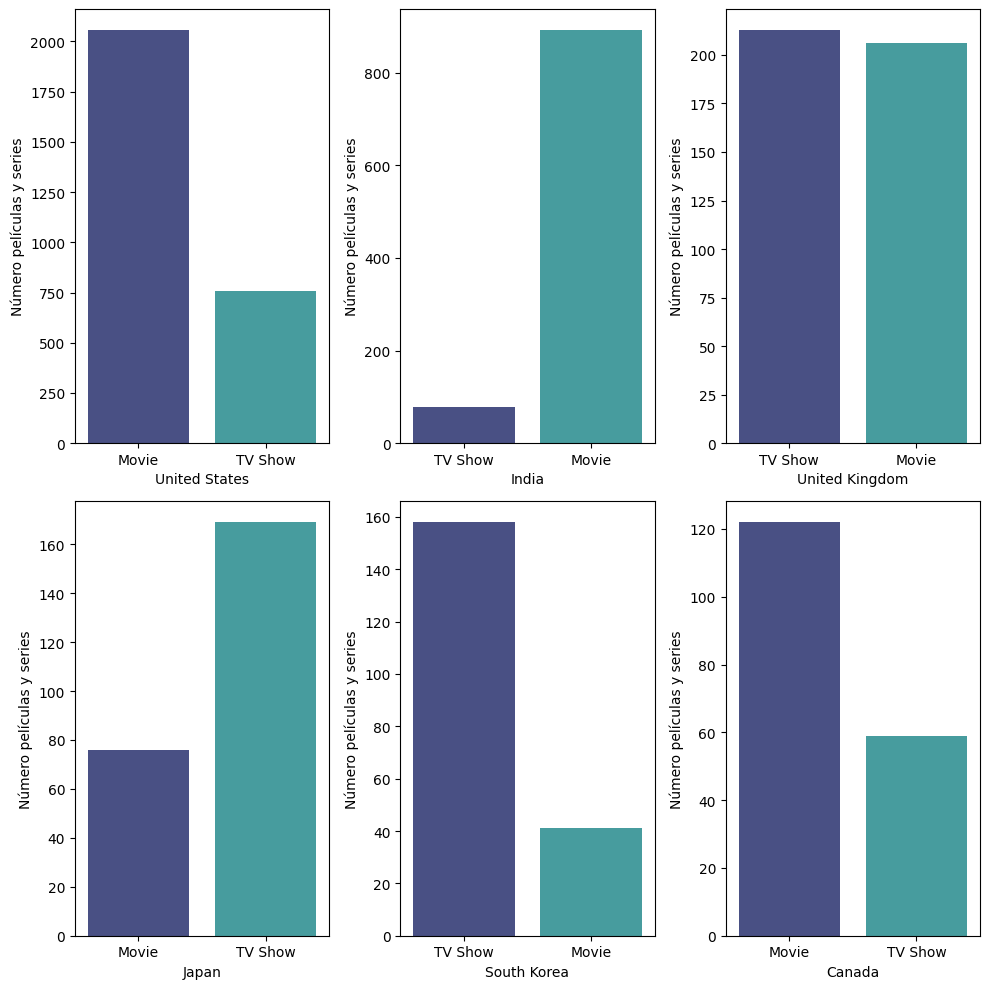

In [273]:
fig, axes = plt.subplots(2,3, figsize=(10,10))

i= 0
j= 0
bucle = 0

for pais in lista_paises: #itero sobre países

    df_paises = df[df["country"]== pais]

    if bucle == 3: #empiezo a llenar siguiente fila
        i=1
        j=0
        print(f"{i}{j}")

    sns.countplot(x = "type", data = df_paises, palette="mako", ax=axes[i][j])
    axes[i][j].set_xlabel(pais)
    axes[i][j].set_ylabel("Número películas y series")

    if bucle <= 2: #cambio índices
        i = 0
        j += 1

    if bucle >= 2:
        i = 1
        j += 1

    bucle +=1
    

plt.tight_layout()
plt.show()

In [252]:
df_prueba = df.groupby("Language").count()["title"].nlargest(10)
df_prueba

Language
English            352
Hindi               28
Spanish             26
French              18
Italian             14
Indonesian           9
Portuguese           9
English/Spanish      5
Japanese             5
Korean               5
Name: title, dtype: int64

In [174]:
df_tipo = df.groupby(["country", "type"])[["title"]].count().sort_values(by = "title", ascending=False)
df_tipo

title
country                                            type          
United States                                      Movie     2058
India                                              Movie      893
United States                                      TV Show    760
United Kingdom                                     TV Show    213
                                                   Movie      206
...                                                           ...
Ireland, Canada                                    Movie        1
Ireland, Canada, Luxembourg, United States, Uni... Movie        1
Ireland, Canada, United Kingdom, United States     Movie        1
Ireland, Canada, United States, United Kingdom     TV Show      1
Zimbabwe                                           Movie        1

[847 rows x 1 columns]

#### Ejercicio 11: ¿Cuál es total de tipos de calificaciones, considerando solo los principales 5 países? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_1367/926252452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country",


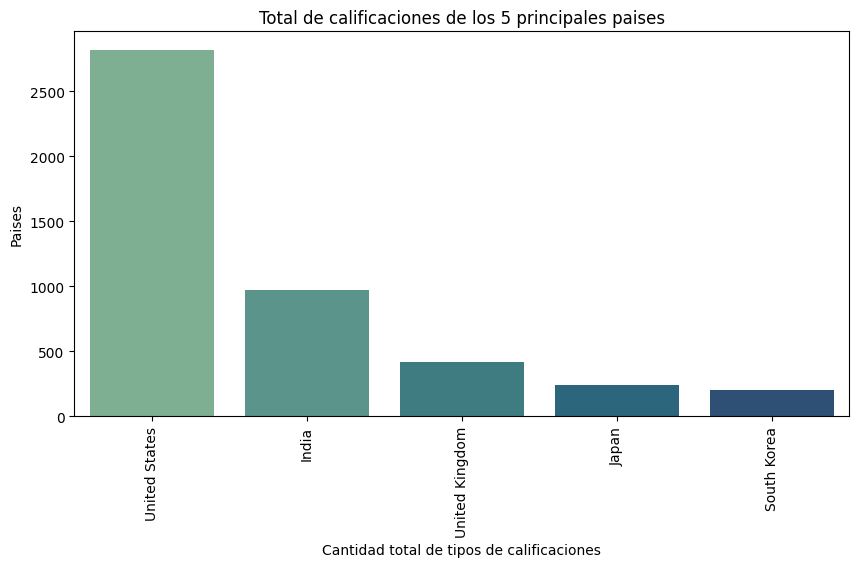

In [213]:
df_agrupado = df.groupby("country")[["rating"]].count().nlargest(5, columns="rating")
plt.figure(figsize=(10,5))
sns.barplot(x="country",
            y="rating",
            data=df_agrupado,
            palette="crest")
plt.title("Total de calificaciones de los 5 principales paises")
plt.xlabel("Cantidad total de tipos de calificaciones")
plt.ylabel("Paises")
plt.xticks(rotation=90);

#### Ejercicio 12: ¿Cómo se distribuyen las 5 primeras calificaciones  a lo largo de los aúltimo 10 años? 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

In [250]:
filtro_2009 = df[df["release_year"] > 2009]

ratings_5top = filtro_2009.groupby("rating").count().nlargest(5, columns="title").reset_index()


rating = ratings_5top["rating"]

rating_lista = list(rating)

df_lista_rating = df[df["rating"].isin(rating_lista)] 
df_lista_rating.head(1)

top_paises_10 = df.groupby("Language").count().nlargest(10, columns="title").reset_index()



In [251]:
top_paises_10

,Language,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,Genre,Premiere,Runtime,IMDB Score
0,English,352,352,352,333,282,341,352,352,352,192,352,352,352,352,352,352,352
1,Hindi,28,28,28,28,28,28,28,28,28,18,28,28,28,28,28,28,28
2,Spanish,26,26,26,26,22,26,26,26,26,16,26,26,26,26,26,26,26
3,French,18,18,18,17,16,16,18,18,18,8,18,18,18,18,18,18,18
4,Italian,14,14,14,14,14,14,14,14,14,3,14,14,14,14,14,14,14
5,Indonesian,9,9,9,9,9,9,9,9,9,4,9,9,9,9,9,9,9
6,Portuguese,9,9,9,9,8,9,9,9,9,2,9,9,9,9,9,9,9
7,English/Spanish,5,5,5,5,0,5,5,5,5,4,5,5,5,5,5,5,5
8,Japanese,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5
9,Korean,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5


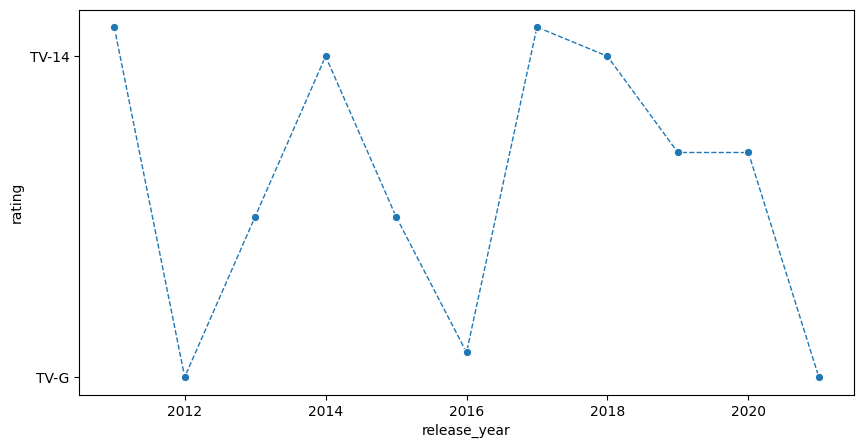

In [274]:
filtro_rating = df["rating"].str.contains(r"-|nr|r|g|ur", case=False, na=False)

filtro_año = df["release_year"].between(df["release_year"].max()-10,df["release_year"].max(),inclusive = "both")

df_filtrado = df[filtro_rating & filtro_año].groupby(["rating","release_year"])[["title"]].count()

plt.figure(figsize=(10,5))
sns.lineplot(x="release_year",
             y="rating",
             data=df_filtrado,
             errorbar= None,
             linewidth = 1,
             linestyle = "dashed", 
             marker = "o");

/var/folders/yj/y1bv8zk12j11bnjq1hc6x_d80000gn/T/ipykernel_1367/3452144314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "rating",


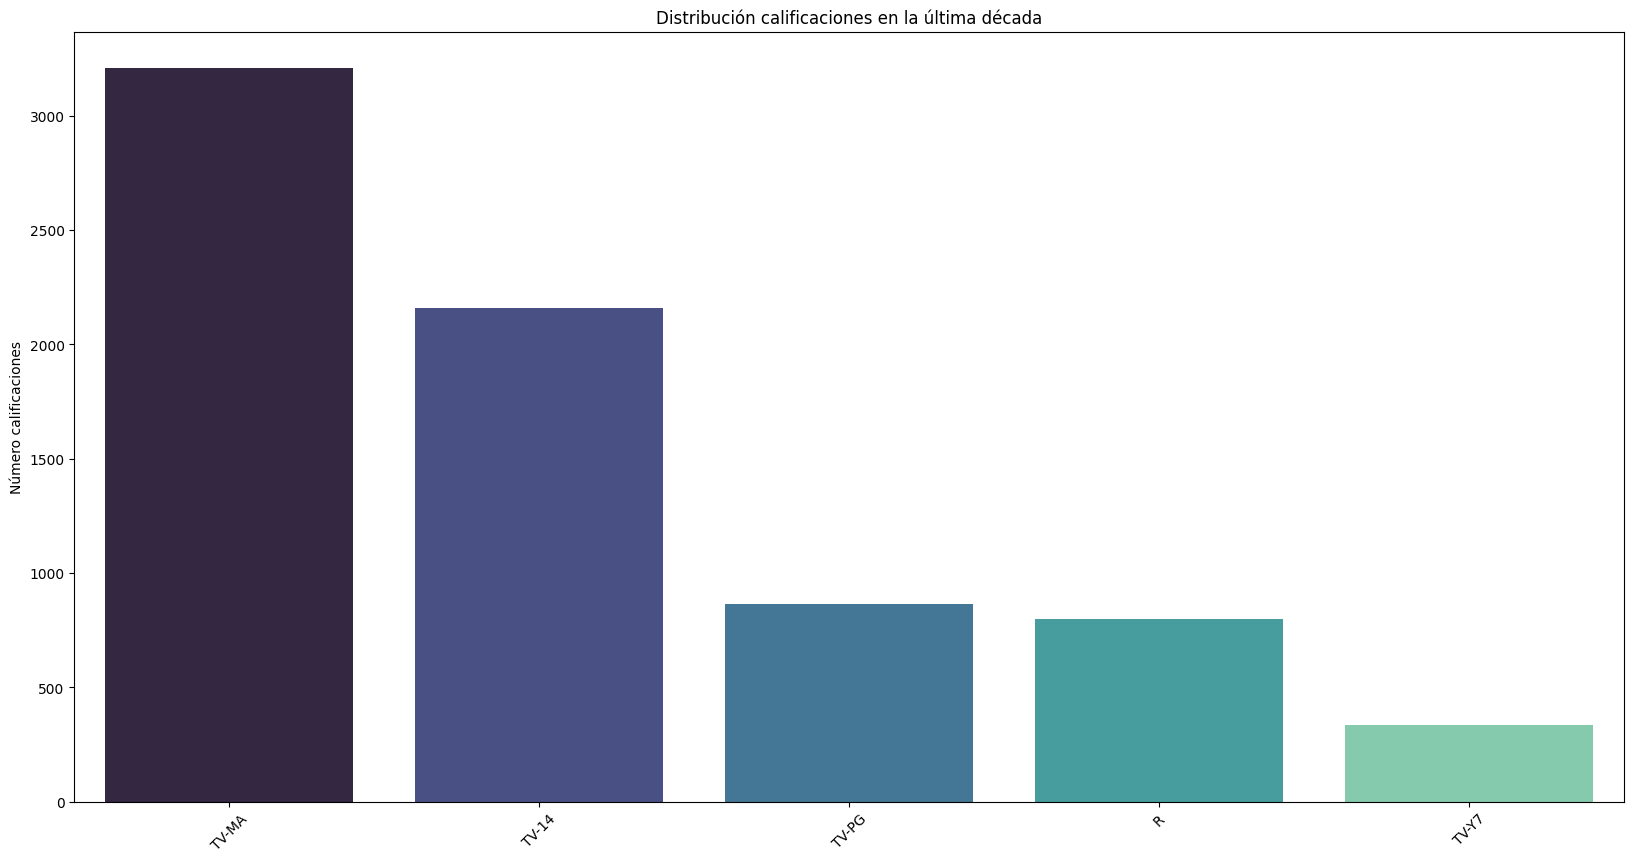

In [243]:
plt.figure(figsize = (20,10))

order_list = top_paises_10
sns.countplot(x = "rating", 
              data = df_lista_rating,
              order = rating_lista,
              palette = "mako"
              );


plt.xlabel(None)
plt.xticks(rotation = 45)
plt.title("Distribución calificaciones en la última década")
plt.ylabel("Número calificaciones")

plt.show()

In [235]:
sns.lineplot(x = df["DateEmployment"].dt.year,
              y = df["TrainingTimesLastYear"], 
              hue = df["Gender"], 
               marker = "o", 
                linewidth = 1, 
                palette="mako", 
                linestyle = "dashed", 
                errorbar = None, 
                ax = axes[1])

axes[1].set_title("Número de formaciones por Año y Género")
axes[1].set_ylabel("Nº Formaciones")
axes[1].set_xlabel("")

plt.tight_layout();

KeyError: 'DateEmployment'


### BONUS

#### Ejercicio 13: ¿Cómo ha evolucionado la cantidad de títulos añadidos a lo largo de los años diferenciando entre Películas y Series?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

- Añade una *grid* al gráfico. 

#### Ejercicio 14: ¿Cómo se distribuyen los títulos según su calificación (rating)? Utiliza un gráfico de “quesitos” para visualizar la proporción de títulos en cada categoría de calificación.

#### Ejercicio 15: ¿Cómo se distribuyen los títulos según su calificación (rating) y tipo (Películas vs Series)? Utiliza un gráfico countplot con el parámetro hue para diferenciar entre películas y series en cada calificación.